# K - Nearest Neighbour Regressor

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')

In [5]:
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [6]:
y_pred=regressor.predict(X_test)

In [7]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9189275159979495
9.009462452972217
127.45860414317289


In [8]:
best_k = 0
best_accuracy = 0
accuracies = []

In [9]:
for k in range(1, 11):
    regressor = KNeighborsRegressor(n_neighbors=k, algorithm='auto')
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    # Calculate accuracy
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Update best k if the current accuracy is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

In [10]:
print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")

Best k: 10
Best accuracy: 0.9220488732633447


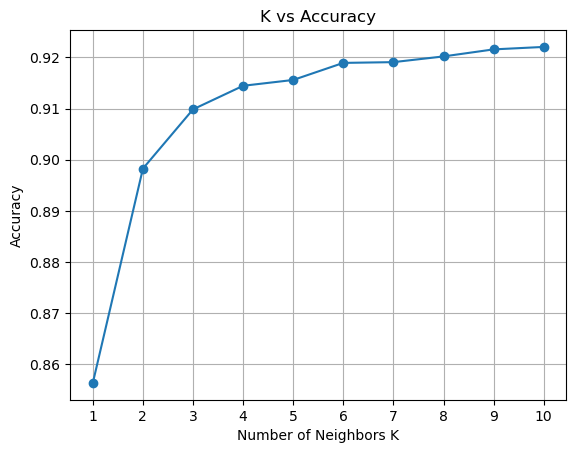

In [11]:
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid()
plt.show()